# アタポン
* アタポンのデータに絞る
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* 平滑化トレンドモデルにしてみる

## インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

## イベントデータ読み込み

In [2]:
input_dir = '../event_data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,2001位,形式,属性,期間
日付,,,,,
2015-09-25,アタシポンコツアンドロイド,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,58517,アタポン,NaN,198.0


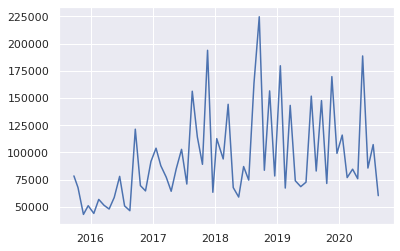

In [4]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '2001位']
ax.plot(x, y)
plt.show()

## stanデータ準備

In [5]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'y':       df['2001位'].tolist(), # 観測値
}

In [6]:
# Stanコード
model = """
data {
  int T;                   // データ取得期間の長さ
  vector[T] y;       // 観測値
}
parameters {
  vector[T] mu;
  real<lower=0> s_w;
  real<lower=0> s_v;
}
model {
  for(i in 3:T){
    mu[i] ~ normal(2*mu[i-1] - mu[i-2], s_w);
    y[i] ~ normal(mu[i], s_v);
  }
}
"""

# Stan実行

In [7]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3740aced05cf22d96ac4408a74567f91 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpvjtvm_j6\stanfit4anon_model_3740aced05cf22d96ac4408a74567f91_5450632637411463546.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 22.4 s


In [8]:
# パラメータ設定
n_itr = 5000
n_warmup = n_itr - 1000
chains = 3

In [9]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

Wall time: 38.2 s


In [10]:
# fit後のファイル保存
save_dir = '../event_data/'
with open(save_dir + 'c2_stan.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  after removing the cwd from sys.path.


In [11]:
# 読み込み
with open(save_dir + 'c2_stan.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [12]:
fit

Inference for Stan model: anon_model_3740aced05cf22d96ac4408a74567f91.
3 chains, each with iter=5000; warmup=4000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]   4.2e4  1292.9  2.3e4  -4686  2.8e4  4.3e4  5.7e4  8.3e4    315   1.01
mu[1]   4.5e4  1198.1  2.0e4 3481.0  3.1e4  4.5e4  5.8e4  8.2e4    290   1.01
mu[2]   4.7e4  1106.9  1.8e4 9664.2  3.5e4  4.8e4  5.9e4  8.1e4    270   1.01
mu[3]   5.0e4  1018.6  1.6e4  1.7e4  3.9e4  5.0e4  6.1e4  8.0e4    257   1.02
mu[4]   5.3e4  931.05  1.5e4  2.3e4  4.3e4  5.3e4  6.3e4  8.0e4    251   1.02
mu[5]   5.5e4  870.66  1.3e4  2.9e4  4.6e4  5.6e4  6.5e4  8.1e4    238   1.02
mu[6]   5.8e4  842.14  1.2e4  3.3e4  5.0e4  5.8e4  6.7e4  8.2e4    216   1.02
mu[7]   6.1e4  775.45  1.2e4  3.8e4  5.3e4  6.1e4  6.9e4  8.3e4    221   1.02
mu[8]   6.4e4  643.93  1.1e4  4.2e4  5.6e4  6.4e4  7.1e4  8.4e4    282   1.02
mu[9]   6.6e4   583.6  1.0e4  4

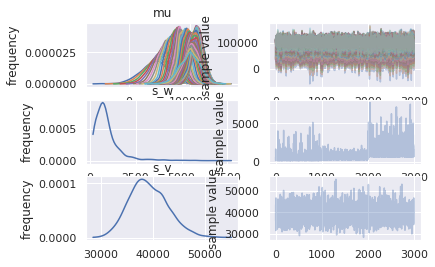

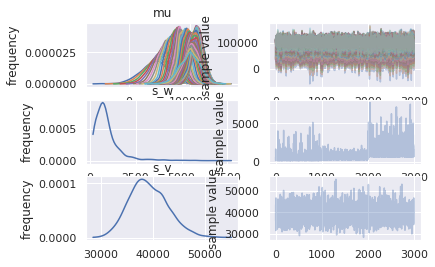

In [13]:
fit.plot()

In [14]:
#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

#x軸
X = df.index

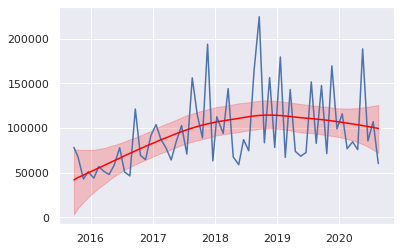

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
# ax.plot(X, mu, label='true trend', c='green')
ax.plot(X, mu_mean, label='predicted trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

こちらも全然当たっていないが、ローカルレベルモデルよりはスムーズになってる